# Week 3 Assignment: Generating a Correlation Coefficient

In this [assignment](https://www.coursera.org/learn/data-analysis-tools/peer/te8hb/generating-a-correlation-coefficient) I've chosen the [Gapminder](./data/gapminder.csv) dataset. Looking through its [codebook](./data/GapMinderCodebook.pdf) we've decided to study two numeric variables, incomeperperson and lifeexpectancy relationship:


- incomeperperson

> 2010 Gross Domestic Product per capita in constant 2000 US$. The World Bank Work Development inflation but not the differences in the cost of living between countries Indicators
has been taken into account.



- lifeexpectancy

> 2011 life expectancy at birth (years). The average number of years a newborn child would live if current mortality patterns were to stay the same.


In [1]:
# Import all ploting and scientific library,
# and embed figures in this file.
%pylab inline

# Package to manipulate dataframes.
import pandas as pd

# Nice looking plot functions.
import seaborn as sn

# The Pearson correlation function.
from scipy.stats import pearsonr

# Read the dataset.
df = pd.read_csv('data/gapminder.csv')

# Set the country name as the index of the dataframe.
df.index = df.country

# This column is no longer needed.
del df['country']

# Select only the variables we're interested.
df = df[['lifeexpectancy','incomeperperson']]

# Convert the types.
df.lifeexpectancy = pd.to_numeric(df.lifeexpectancy, errors='coerce')
df.incomeperperson = pd.to_numeric(df.incomeperperson, errors='coerce')

# Remove missing values.
df = df.dropna()

Populating the interactive namespace from numpy and matplotlib


## Pearson correlation $r$

This is just straightfoward.

In [2]:
r = pearsonr(df.incomeperperson, df.lifeexpectancy)

In [3]:
print('Correlation between incomeperperson and lifeexpectancy: {}'.format(r))

Correlation between incomeperperson and lifeexpectancy: (0.60151634019643963, 1.0653418935026235e-18)


In [4]:
print('Percentage of variability in the reponse variable given by the explanatory variable is {:2}%'.
      format(round(r[0]**2*100,2)))

Percentage of variability in the reponse variable given by the explanatory variable is 36.18%


As we can see above, $r = 0.60$ with $pvalue=1.06*10^{-18}$, shows a moderately strong correlation between life expectancy and income per person. Let's take a look at the scatter plot to see how this correlation is formed.

/Users/sergio/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


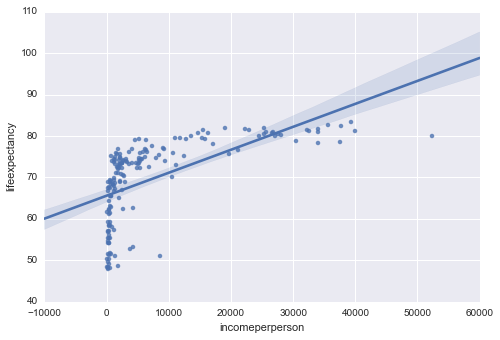

In [5]:
# Setting an apropriate size for the graph.
factor = 1.3
figsize(6*factor, 4*factor)

# Plot the graph.
sn.regplot(df.incomeperperson, df.lifeexpectancy);

## Conclusion

The scatter plot clearly shows a positive relationship between incomeperperson and lifeexpectancy but, as you can see, the association isn't as linear as expected. A lot of countries is stacked below 5000 income. Above this, the life expectancy keeps in its top values. This show us that the lifeexpectancy rises to a limit of around 80 years as the incomeperperson rises.

End of assignment.